In [ ]:
import pandas as pd

# Cargar el archivo CSV
file_path = './CausaMigrMunicipio_Poblacion.csv'

# Cargar el archivo CSV con la codificación 'ISO-8859-1'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Verificar las primeras filas del DataFrame
df.head()


,Municipio,desc_entidad,Educativa,Familiar,Inseguridad delictiva o violencia,Otra causa,Trabajo,Total general,Poblacion,C_educativa,C_familiar,C_Inseguridad delictiva o violencia,C_Otra causa,C_trabajo
0,001 Abalá,Yucatán,1.92,71.15,4.81,13.46,6.73,98.08,207.0,4.0,147.0,10.0,28.0,14.0
1,001 Abasolo,Coahuila de Zaragoza,6.12,66.33,1.02,7.14,15.31,95.92,32.0,2.0,21.0,0.0,2.0,5.0
2,001 Abasolo,Guanajuato,4.39,60.20,2.63,6.35,23.03,96.59,32.0,1.0,19.0,1.0,2.0,7.0
3,001 Abasolo,Nuevo León,2.62,63.87,6.28,14.14,13.09,100.00,32.0,1.0,20.0,2.0,5.0,4.0
4,001 Abasolo,Tamaulipas,4.34,58.90,5.71,10.27,18.72,97.95,32.0,1.0,19.0,2.0,3.0,6.0


## A. Causas de migración:

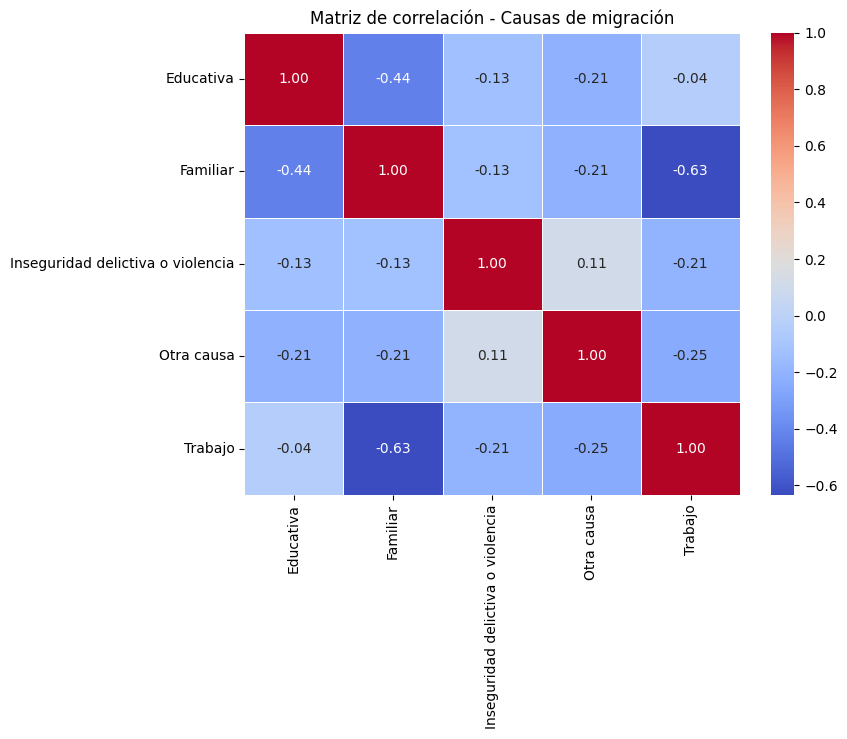

In [ ]:
# Selección de variables relacionadas con causas de migración
df_corr_migracion = df[['Educativa', 'Familiar', 'Inseguridad delictiva o violencia', 'Otra causa', 'Trabajo']]

# Calcular la matriz de correlación
corr_migracion = df_corr_migracion.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr_migracion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de correlación - Causas de migración")
plt.show()


In [ ]:
corr_migracion

,Educativa,Familiar,Inseguridad delictiva o violencia,Otra causa,Trabajo
Educativa,1.000000,-0.435504,-0.133240,-0.208375,-0.035611
Familiar,-0.435504,1.000000,-0.129689,-0.213925,-0.633981
Inseguridad delictiva o violencia,-0.133240,-0.129689,1.000000,0.107632,-0.205636
Otra causa,-0.208375,-0.213925,0.107632,1.000000,-0.246255
Trabajo,-0.035611,-0.633981,-0.205636,-0.246255,1.000000


## B. Demográficas y sociales:



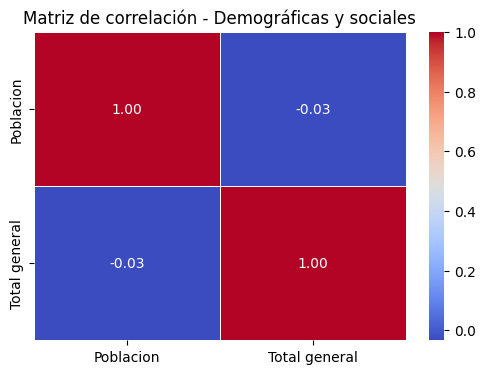

In [ ]:
# Selección de variables demográficas y sociales
df_corr_demograficas = df[['Poblacion', 'Total general']]

# Calcular la matriz de correlación
corr_demograficas = df_corr_demograficas.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(6, 4))
sns.heatmap(corr_demograficas, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de correlación - Demográficas y sociales")
plt.show()


In [ ]:
corr_demograficas

,Poblacion,Total general
Poblacion,1.00000,-0.03422
Total general,-0.03422,1.00000


## C. Variables derivadas:

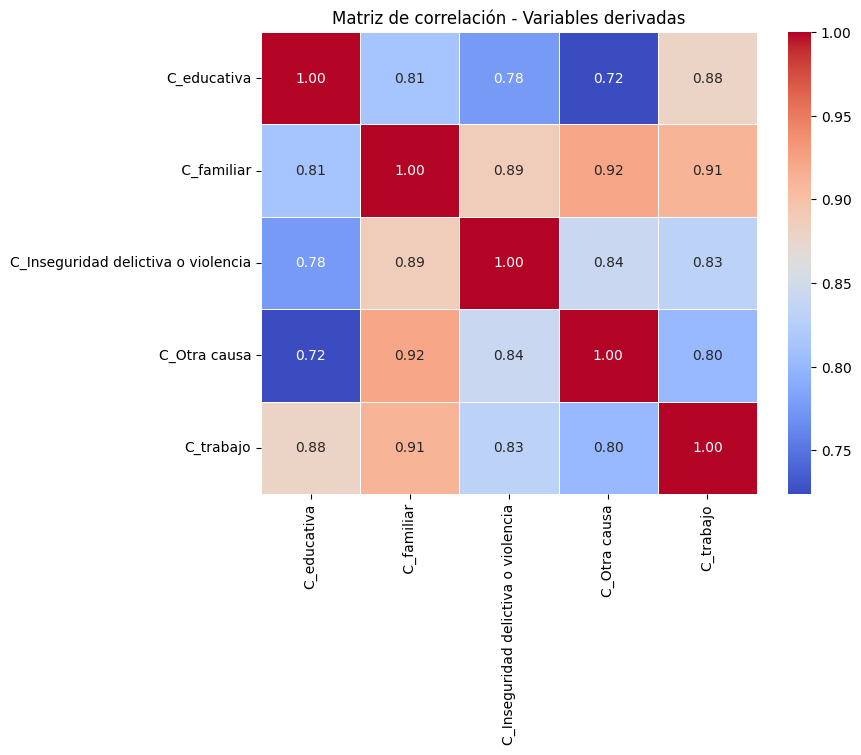

In [ ]:
# Selección de las variables derivadas
df_corr_derived = df[['C_educativa', ' C_familiar', 'C_Inseguridad delictiva o violencia', 'C_Otra causa', 'C_trabajo']]

# Calcular la matriz de correlación
corr_derived = df_corr_derived.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr_derived, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de correlación - Variables derivadas")
plt.show()


In [ ]:
corr_derived

,C_educativa,C_familiar,C_Inseguridad delictiva o violencia,C_Otra causa,C_trabajo
C_educativa,1.000000,0.812904,0.776541,0.723927,0.878985
C_familiar,0.812904,1.000000,0.885748,0.922024,0.911302
C_Inseguridad delictiva o violencia,0.776541,0.885748,1.000000,0.842357,0.830929
C_Otra causa,0.723927,0.922024,0.842357,1.000000,0.802028
C_trabajo,0.878985,0.911302,0.830929,0.802028,1.000000


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# Realizar prueba de causalidad de Granger
grangercausalitytests(df[['Inseguridad delictiva o violencia', 'Otra causa']], maxlag=4)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4659  , p=0.4949  , df_denom=2465, df_num=1
ssr based chi2 test:   chi2=0.4665  , p=0.4946  , df=1
likelihood ratio test: chi2=0.4665  , p=0.4946  , df=1
parameter F test:         F=0.4659  , p=0.4949  , df_denom=2465, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3703  , p=0.6906  , df_denom=2462, df_num=2
ssr based chi2 test:   chi2=0.7421  , p=0.6900  , df=2
likelihood ratio test: chi2=0.7420  , p=0.6900  , df=2
parameter F test:         F=0.3703  , p=0.6906  , df_denom=2462, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7646  , p=0.1518  , df_denom=2459, df_num=3
ssr based chi2 test:   chi2=5.3088  , p=0.1505  , df=3
likelihood ratio test: chi2=5.3031  , p=0.1509  , df=3
parameter F test:         F=1.7646  , p=0.1518  , df_denom=2459, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4084  , p=0.

{1: ({'ssr_ftest': (0.46593491059544223, 0.49492740859395534, 2465.0, 1),
   'ssr_chi2test': (0.4665019713385604, 0.49460084223805834, 1),
   'lrtest': (0.4664578877345775, 0.49462123499050525, 1),
   'params_ftest': (0.46593491059564895, 0.49492740859395534, 2465.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.3703082099738494, 0.690559926170327, 2462.0, 2),
   'ssr_chi2test': (0.7421205150328891, 0.6900023624773717, 2),
   'lrtest': (0.7420089154293237, 0.6900408655466495, 2),
   'params_ftest': (0.37030820997339486, 0.6905599261706106, 2462.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.764583427385555, 0.15180895305949396, 2459.0, 3),
   'ssr_chi2test': (5.308819925090824, 0.15053110228260766, 3),
   'lrtest': (5.303113683197807, 0.15090047646967789, 3),
   'params_ftest': (1.7645834273856345, 0.1518089530594466, 2459.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [